In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

n_colors = 64
n_clusters=n_colors
# Load the Summer Palace photo
china = load_sample_image("china.jpg")
print(china.shape)

china = np.array(china, dtype=np.float64) / 255
w, h, d = original_shape = tuple(china.shape)
image_array = np.reshape(china, (w * h, d))
image_array_sample = shuffle(image_array, random_state=0)[:1000]

(427, 640, 3)


C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\sklearn\datasets\base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


In [63]:
image_array_sample.shape

(1000, 3)

In [64]:
def dist_eclud(vec_a, vec_b):
    """
    计算距离
    """
    return np.sqrt(np.sum(np.power(vec_a-vec_b, 2)))
def rand_cent(data_set, k):
    """
    随机选取质心
    """
    m = np.shape(data_set)[1]
    center = np.mat(np.zeros((k, m)))
    for col in range(m):
        min_col = min(data_set[:, col])
        max_col = max(data_set[:, col])
        center[:, col] = min_col + float((max_col-min_col)) * np.random.rand(k, 1)
    return center
def kmeans(data_set, k, dist_method=dist_eclud, cent_methon=rand_cent):
    sample_count = np.shape(data_set)[0]
    is_change = True
    keep_result = np.mat(np.zeros((sample_count, 2)))
    center_roids= cent_methon(data_set, k)
    while is_change:
        is_change = False
        for sample_index in range(sample_count):
            min_dist, min_index = np.Inf, -1
            for j in range(k):
                dist_j = dist_method(data_set[sample_index,:], center_roids[j,:])
                if dist_j< min_dist:
                    min_dist , min_index = dist_j , j
            if keep_result[sample_index, 0] != min_index:
                is_change = True
            keep_result[sample_index,:] = min_index, min_dist**2
        for cent_index in range(k):
            temp_cluster = data_set[np.nonzero(keep_result[:,0].A==cent_index)[0]]
            center_roids[cent_index,:] = np.mean(temp_cluster, axis=0)
    return  keep_result

In [11]:
result = kmeans(image_array_sample,n_colors+1)

C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\Magneto_Wang\Anaconda3\lib\site-packages\numpy\core\_methods.py:73: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


In [13]:
result.shape

(1000, 2)

In [14]:
X=image_array

In [15]:
norms = np.einsum('ij,ij->i', X, X)

In [ ]:
n_samples = X.shape[0]
labels = -np.ones(n_samples, np.int32)
distances = np.zeros(shape=(0,), dtype=X.dtype)

In [ ]:
    n_samples = X.shape[0]
    labels, mindist = pairwise_distances_argmin_min(
        X=X, Y=centers, metric='euclidean', metric_kwargs={'squared': True})
    # cython k-means code assumes int32 inputs
    labels = labels.astype(np.int32)
    inertia = mindist.sum()
    return labels, inertia

In [24]:
def row_norms(X, squared=False):
    """Row-wise (squared) Euclidean norm of X.

    Equivalent to np.sqrt((X * X).sum(axis=1)), but also supports sparse
    matrices and does not create an X.shape-sized temporary.

    Performs no input validation.
    """
    norms = np.einsum('ij,ij->i', X, X)

    if not squared:
        np.sqrt(norms, norms)
    return norms

In [17]:
image_array_sample.shape

(1000, 3)

In [18]:
X=image_array_sample
n_clusters=3

In [19]:
n_samples = X.shape[0]
precompute_distances = (n_clusters * n_samples) < 12e6

In [20]:
X_mean = X.mean(axis=0)
X -= X_mean

In [25]:
x_squared_norms = row_norms(X, squared=True)

In [26]:
best_labels, best_inertia, best_centers = None, None, None

In [40]:
from numpy import *  
import time  
import matplotlib.pyplot as plt

In [67]:
def initCentroids(dataSet, k):  
	numSamples, dim = dataSet.shape   #矩阵的行数、列数 
	centroids = zeros((k, dim))  		#感觉要不要你都可以
	for i in range(k):  
		index = int(random.uniform(0, numSamples))  #随机产生一个浮点数，然后将其转化为int型
		centroids[i, :] = dataSet[index, :]  
	return centroids  

In [44]:
initCentroids(X,n_clusters)

array([[-0.11921176, -0.22951373, -0.2546    ],
       [ 0.23372941,  0.17048627,  0.14147843],
       [ 0.07686667,  0.06460392, -0.04283529]])

In [65]:
# k-means cluster 
#dataSet为一个矩阵
#k为将dataSet矩阵中的样本分成k个类 
def kmeans(dataSet, k):  
	numSamples = dataSet.shape[0]  #读取矩阵dataSet的第一维度的长度,即获得有多少个样本数据
    # first column stores which cluster this sample belongs to,  
    # second column stores the error between this sample and its centroid  
	clusterAssment = mat(zeros((numSamples, 2)))  #得到一个N*2的零矩阵
	clusterChanged = True  
  
    ## step 1: init centroids  
	centroids = initCentroids(dataSet, k)  #在样本集中随机选取k个样本点作为初始质心
  
	while clusterChanged:  
		clusterChanged = False  
        ## for each sample  
		for i in range(numSamples):  #range
			minDist  = 100000.0  
			minIndex = 0  
            ## for each centroid  
            ## step 2: find the centroid who is closest  
			#计算每个样本点与质点之间的距离，将其归内到距离最小的那一簇
			for j in range(k):  
				distance = euclDistance(centroids[j, :], dataSet[i, :])  
				if distance < minDist:  
					minDist  = distance  
					minIndex = j  
              
            ## step 3: update its cluster 
			#k个簇里面与第i个样本距离最小的的标号和距离保存在clusterAssment中
			#若所有的样本不在变化，则退出while循环
			if clusterAssment[i, 0] != minIndex:  
				clusterChanged = True  
				clusterAssment[i, :] = minIndex, minDist**2  #两个**表示的是minDist的平方
  
        ## step 4: update centroids  
		for j in range(k):  
			#clusterAssment[:,0].A==j是找出矩阵clusterAssment中第一列元素中等于j的行的下标，返回的是一个以array的列表，第一个array为等于j的下标
			pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]] #将dataSet矩阵中相对应的样本提取出来 
			centroids[j, :] = mean(pointsInCluster, axis = 0)  #计算标注为j的所有样本的平均值
  
	print ('Congratulations, cluster complete!')  
	return centroids, clusterAssment  
  
# show your cluster only available with 2-D data 
#centroids为k个类别，其中保存着每个类别的质心
#clusterAssment为样本的标记，第一列为此样本的类别号，第二列为到此类别质心的距离 
def showCluster(dataSet, k, centroids, clusterAssment):  
	numSamples, dim = dataSet.shape  
	if dim != 3:  
		print ("Sorry! I can not draw because the dimension of your data is not 2!")  
		return 1  
  
	mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']  
	if k > len(mark):  
		print ("Sorry! Your k is too large! please contact wojiushimogui")  
		return 1 
     
  
    # draw all samples  
	for i in range(numSamples):  
		markIndex = int(clusterAssment[i, 0])  #为样本指定颜色
		plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  
  
	mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']  
    # draw the centroids  
	for i in range(k):  
		plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 12)  
  
	plt.show() 

In [66]:
# calculate Euclidean distance  
def euclDistance(vector1, vector2):  
	return sqrt(sum(power(vector2 - vector1, 2)))  #求这两个矩阵的距离，vector1、2均为矩阵

In [68]:
centroids, clusterAssment=kmeans(X, 3)

Congratulations, cluster complete!


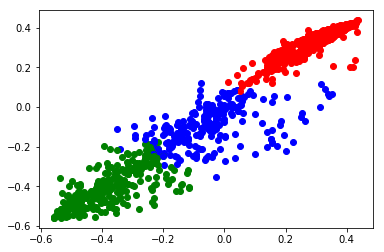

In [69]:
showCluster(X, 3, centroids, clusterAssment)

In [73]:
centroids.shape

(3, 3)

In [74]:
clusterAssment.shape

(1000, 2)

In [75]:
centroids

array([[ 0.28279622,  0.3221317 ,  0.38386055],
       [-0.05168467, -0.09394659, -0.18025566],
       [-0.3823157 , -0.40832957, -0.43367215]])

In [76]:
clusterAssment

matrix([[ 0.        ,  0.        ],
        [ 1.        ,  0.21831603],
        [ 1.        ,  0.4669281 ],
        ..., 
        [ 0.        ,  0.        ],
        [ 0.        ,  0.        ],
        [ 2.        ,  0.02097067]])

In [77]:
X.shape

(1000, 3)

In [80]:
def predict_data(dataSet, k,centroids, clusterAssment):
    numSamples = dataSet.shape[0]
    label=[]
    predict_Assment = mat(zeros((numSamples, 2)))
    
    clusterChanged = True
    for i in range(numSamples):
        minDist  = 100000.0 
        minIndex = 0
        for j in range(k):  
            distance = euclDistance(centroids[j, :], dataSet[i, :])
            if distance < minDist:
                minDist  = distance
                minIndex = j
            if predict_Assment[i, 0] != minIndex:
                clusterChanged = True
                predict_Assment[i, :] = minIndex, minDist**2 
                
                
    return predict_Assment
        
        #print("minIndex = "+str(minIndex))

In [123]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            #labelIndex,dist= labels[i, :]
            image[i][j] = codebook[int(label[label_idx, :][0,:1])]
            label_idx += 1
    return image

In [82]:
label=predict_data(image_array,3,centroids, clusterAssment)

In [120]:
label.shape
int(label[10, :][0,:1])

0

In [124]:
image=recreate_image(centroids,label,w,h)

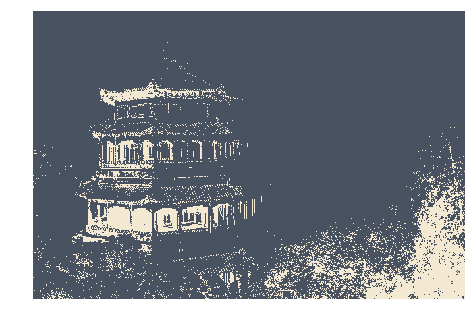

In [127]:
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
#plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(image)